In [4]:
import os
import tarfile
import pandas as pd
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()

In [7]:

Data = load_housing_data()

In [8]:
Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
Data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


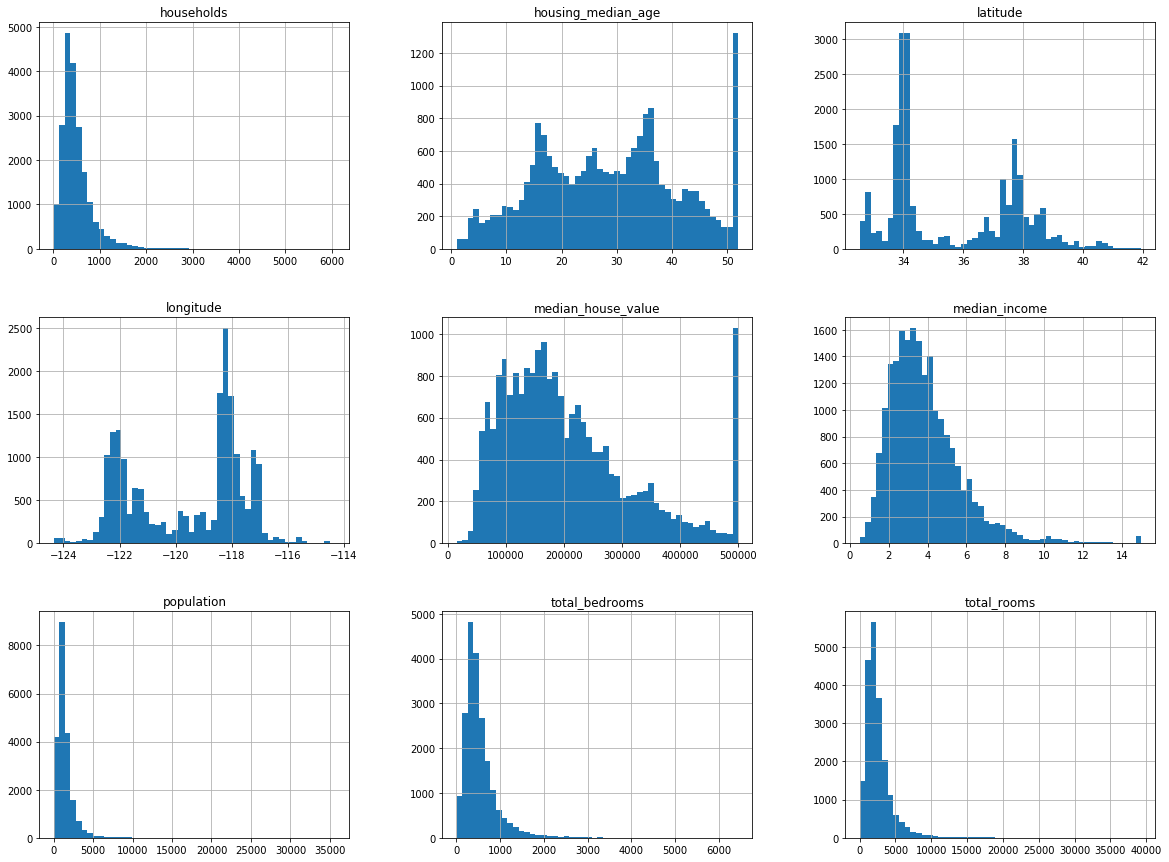

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
Data.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Data, test_size=0.2,random_state=42)

In [14]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [15]:
import numpy as np

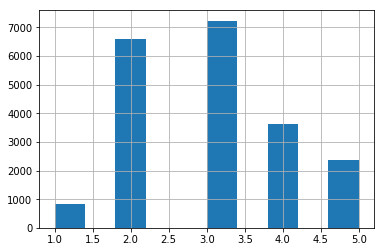

In [16]:
Data['income_cat'] = pd.cut(Data['median_income'],
                           bins=[0,1.5,3.0,4.5,6.0,np.inf],
                           labels=[1,2,3,4,5])
Data['income_cat'].hist()

In [17]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=43)
for train_index, test_index in split.split(Data,Data['income_cat']):
    strat_train = Data.loc[train_index]
    strat_test = Data.loc[test_index]

In [18]:
strat_test['income_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [19]:
for s in (strat_train, strat_test):
    s.drop('income_cat',axis=1,inplace=True)

In [20]:
strat_train.shape

(16512, 10)

In [21]:
housing = strat_train.copy()

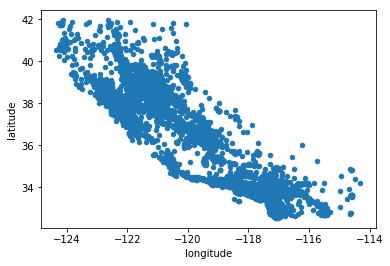

In [22]:
housing.plot(kind='scatter',y='latitude', x = 'longitude')

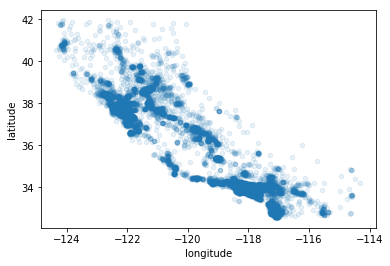

In [23]:
housing.plot(kind='scatter',x='longitude', y='latitude',alpha=0.1)

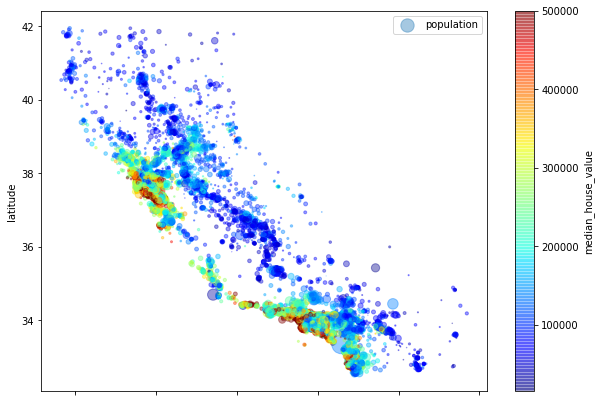

In [24]:
housing.plot(kind='scatter',x = 'longitude', y = 'latitude',
              alpha=0.4,s = housing['population']/100,label='population',
               figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690551
total_rooms           0.135290
housing_median_age    0.107099
households            0.066341
total_bedrooms        0.050002
population           -0.024069
longitude            -0.040318
latitude             -0.148121
Name: median_house_value, dtype: float64

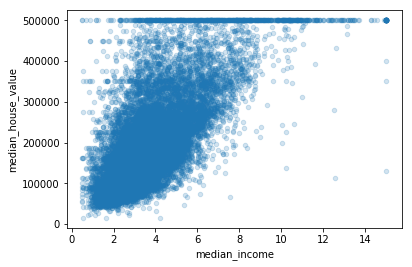

In [27]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.2)

In [28]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690551
rooms_per_household         0.156074
total_rooms                 0.135290
housing_median_age          0.107099
households                  0.066341
total_bedrooms              0.050002
population_per_household   -0.022871
population                 -0.024069
longitude                  -0.040318
latitude                   -0.148121
bedrooms_per_room          -0.257121
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train.drop('median_house_value',axis=1)
housing_labels = strat_train['median_house_value'].copy()

In [32]:
#Data Cleaning
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [38]:
housing_num['total_bedrooms'].isna().any()

False

In [40]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x,columns=housing_num.columns)

In [42]:
#Handling Categorical Attributes
housing_cat = housing[['ocean_proximity']]
housing_cat.head(5)

,ocean_proximity
6227,<1H OCEAN
10200,<1H OCEAN
17680,<1H OCEAN
15392,<1H OCEAN
9268,NEAR BAY


In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [44]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [1.],
       [4.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')),
    ('attr_addr' , CombinedAttributesAdder()),
    ('std_scaler' , StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [54]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [59]:
from sklearn.linear_model import LinearRegression
    
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:',lin_reg.predict(some_data_prepared))

print('labels:',list(some_labels))

predictions: [184970.64678445 239340.4344935  246683.7951888  165288.35480714
 284539.6402469 ]
labels: [202800.0, 187000.0, 212800.0, 250000.0, 307000.0]


In [60]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68116.54761715344

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                         scoring='neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [63]:
def display_scores(scores):
    print('scores',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

display_scores(tree_rmse_scores)

scores [66814.22682217 68359.10882515 69178.54198483 67678.2690505
 68114.22033991 68812.46170521 66460.18040211 71479.90134288
 72453.45904261 71835.44659795]
Mean: 69118.58161133247
Standard deviation: 2005.3201013283615


In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions,housing_labels)

forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22259.717259150442


In [66]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                        scoring='neg_mean_squared_error',cv=10)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

scores [50660.31550274 51669.89617368 51979.18132753 53262.30517253
 52466.38284852 50463.30839191 51248.84251355 53074.35053351
 53904.61301349 54955.2470225 ]
Mean: 52368.44424999534
Standard deviation: 1371.0760589325027


# saving and loading a model

In [67]:
#from sklearn.externals import joblib
#joblib.dump(my_model, "my_model.pkl")
# and later...
#my_model_loaded = joblib.load("my_model.pkl")